# How to plot river profile from the observed data (dem data)

1.Create dem.tif of the specific area for Topotoolbox input

2.Plot river profile by Topotoolbox

3.Plot river profile with python

## 1. Create dem.tif of the specific area for Topotoolbox input

### DEM Data
 - [SRTM Verison 3.0 (3 arc second, 90m resolution)](https://opentopography.org/news/srtm-version-30-global-90m-and-united-states-30m-elevation-data-now-available)
 - [ETOPO1 (1 arc-minute)](https://www.ngdc.noaa.gov/mgg/global/)
 - [USGS](https://earthexplorer.usgs.gov/)

### Documents
- [GDAL documentation](https://gdal.org/index.html#)
- [Python GDAL/OGR Cookbook](http://pcjericks.github.io/py-gdalogr-cookbook/)
- [HeadFirst GDAL](https://headfirst-gdal.readthedocs.io/en/latest/index.html)
- [A Gentle Introduction to GDAL, Part 3: Geodesy & Local Map Projections](https://medium.com/planet-stories/a-gentle-introduction-to-gdal-part-3-geodesy-local-map-projections-794c6ff675ca)
- [Projections](https://proj.org/operations/projections/tmerc.html)

### GIS software
[Global Mapper](https://www.bluemarblegeo.com/products/global-mapper-download.php)

### Topographic analysis tool
[TopoToolbox](https://topotoolbox.wordpress.com/)

TopoToolbox 2 reads the ESRI ascii grid format and single band geotiffs into an instance of GRIDobj.
Note that, throughout the use of TopoToolbox, it is assumed that the DEM has a projected
coordinate system (e.g. UTM WGS84) and that elevation and horizontal coordinates are in meter
units

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from matplotlib.colors import LightSource

### SRTM

Download the SRTM data of a specific area from [Opentopography](https://portal.opentopography.org/raster?opentopoID=OTSRTM.042013.4326.1).

Here presents the SRTM data of the three rivers region:

1.Data Selection Coordinates: Xmin = 91, Ymin =21, Xmax = 106, Ymax = 35

2.Data Output Formats: GeoTiff

In [2]:
# project the SRTM data for Topotoolbox input

input_file = "Data_DEM/srtm_TRR_90m.tif"
output_file = "Data_DEM/srtm_TRR_90m_input.tif"

#!gdalinfo --version
#!gdalinfo $input_file

proj_input = 'EPSG:4326'
# lat_0 = (Ymin+Ymax)/2 lon_0 = (Xmin+Xmax)/2 
#proj_output = "'+proj=tmerc +lat_0=29 +lon_0=100 +k=1 x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'" 
proj_output = "'+proj=tmerc +lat_0=28 +lon_0=98.5 +k=1 x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'" 


!gdalwarp -s_srs $proj_input -t_srs $proj_output -ts 1400 0 -r bilinear $input_file $output_file

Creating output file that is 1400P x 1413L.
Processing Data_DEM/srtm_TRR_90m.tif [1/1] : 0Using internal nodata values (e.g. -32768) for image Data_DEM/srtm_TRR_90m.tif.
Copying nodata values from source Data_DEM/srtm_TRR_90m.tif to destination Data_DEM/srtm_TRR_90m_input.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


## 2. Plot river profile by Topotoolbox

2.1 Download the Topotoolbox package 

2.2 Run "Qixiang_RiverProfile_Topotoolbox.m" in matlab, the output river data is saved in "Data_Rivers/"

## 3. Plot river profile with python

In [3]:
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def moving_average(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, 'same')  

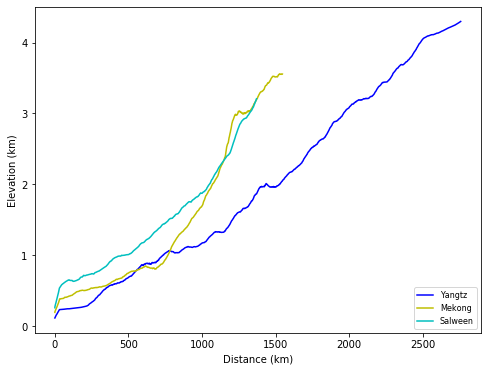

In [5]:
rivers = [1,2,3] # 'Yangtz','Mekong','Salween'
window_size = 50

labels= ['Yangtz','Mekong','Salween']
colors =['b','y','c']
Fig1, (f1) = plt.subplots(1,1,figsize=(8,6))
for i in range(0,len(rivers)):
    fname = 'Data_Rivers/river'+str(rivers[i])+'.mat'
    data  = scio.loadmat(fname) 
    
    dist = data["distance"]/1000.  # unit from m to km 
    dist[np.where(np.isnan(dist))]=0.
    dist = dist.T
    
    elev = data['elevation']/1000. # unit from m to km 
    elev[np.where(np.isnan(elev))]=0.
    #elev[np.where(np.isnan(elev))]=elev[:,int(np.where(np.isnan(elev))[:][1]-1000)] 
    elev = elev.T

    elev_smooth = moving_average(interval = elev.flatten(), window_size =window_size)
    label = labels[i]
    color = colors[i]
    f1.plot(dist[window_size:len(dist)],elev_smooth[window_size:len(dist)],label=label,color=color)

f1.set_xlabel("Distance (km)")
f1.set_ylabel("Elevation (km)")
plt.legend(loc = 'lower right',prop = {'size':8}) 